In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np
from pathlib import Path
import random
from insightface.app import FaceAnalysis
from scipy import spatial
from tqdm.notebook import tqdm
import pickle

In [2]:
def calculate_cosine_distance(a, b):
    return float(spatial.distance.cosine(a, b))


def calculate_cosine_similarity(a, b):
    return 1 - calculate_cosine_distance(a, b)


def process_image(file_path, app):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = app.get(img)
    if len(faces) == 0:
        return None
    faces.sort(key=lambda x: x.det_score, reverse=True)
    vector = faces[0].normed_embedding  # Нормализованный эмбеддинг
    return vector

In [8]:
distances = []
labels = []
FACES = r'D:\data\bioH/small/**'

app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(128, 128))

file_paths = list(glob.iglob(FACES, recursive=True))
file_paths = [f for f in file_paths if f.endswith('.jpg')]  # Только .jpg файлы

embeddings_small = dict()

for i, file_path1 in tqdm(enumerate(file_paths), total=len(file_paths), desc="Compute embeddings"):
    path1 = Path(file_path1)
    folder1 = path1.parent.name
    
    embedding1 = process_image(file_path1, app)
    if embedding1 is None:
        print(f"Лицо не найдено в {file_path1}")
        embeddings_small[file_path1] = None
    else:
        embeddings_small[file_path1] = process_image(file_path1, app)

comparisons_done_small = set()
folder_names = []

for i, file_path1 in tqdm(enumerate(file_paths), total=len(file_paths), desc="Comparing images"):
    path1 = Path(file_path1)
    folder1 = path1.parent.name
    
    embedding1 = embeddings_small[file_path1]
    if embedding1 is None:
        print(f"Лицо не найдено в {file_path1}")
        continue
    
    for j in range(i + 1, len(file_paths)):
        file_path2 = file_paths[j]
        path2 = Path(file_path2)
        folder2 = path2.parent.name
    
        comparison_key = (i, j)
    
        if comparison_key in comparisons_done_small:
            continue
    
        embedding2 = embeddings_small[file_path2]
        if embedding2 is None:
            print(f"Лицо не найдено в {file_path2}")
            continue
    
        similarity = calculate_cosine_similarity(embedding1, embedding2)
        distances.append(similarity)
    
        label = 1 if folder1 == folder2 else 0
        labels.append(label)
    
        comparisons_done_small.add(comparison_key)
        
# with open('distances_small.pkl', 'wb') as file:
#     pickle.dump(distances, file)
#     
# with open('labels_small.pkl', 'wb') as file:
#     pickle.dump(labels, file)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'has_user_compute_stream': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'enable_cuda_graph': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'prefer_nhwc': '0', 'use_ep_level_unified_stream': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\alenko/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'de

Compute embeddings:   0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\alenko\.conda\envs\Test_biometric\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


Comparing images:   0%|          | 0/500 [00:00<?, ?it/s]

In [4]:
distances_big = []
labels_big = []
FACES = r'D:\data\bioH\big\**'
app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(512, 512))

file_paths = list(glob.iglob(FACES, recursive=True))
file_paths = [f for f in file_paths if f.endswith('.jpg')]  # Только .jpg файлы

embeddings_big = dict()

for i, file_path1 in tqdm(enumerate(file_paths), total=len(file_paths), desc="Compute embeddings"):
    path1 = Path(file_path1)
    folder1 = path1.parent.name
    
    embedding1 = process_image(file_path1, app)
    if embedding1 is None:
        print(f"Лицо не найдено в {file_path1}")
        embeddings_big[file_path1] = None
    else:
        embeddings_big[file_path1] = process_image(file_path1, app)

        
        
comparisons_done_big = set()
folder_names = []

for i, file_path1 in tqdm(enumerate(file_paths), total=len(file_paths), desc="Comparing images"):
    path1 = Path(file_path1)
    folder1 = path1.parent.name
    
    embedding1 = embeddings_big[file_path1]
    if embedding1 is None:
        print(f"Лицо не найдено в {file_path1}")
        continue
    
    for j in range(i + 1, len(file_paths)):
        file_path2 = file_paths[j]
        path2 = Path(file_path2)
        folder2 = path2.parent.name
    
        comparison_key = (i, j)
    
        if comparison_key in comparisons_done_big:
            continue
    
        embedding2 = embeddings_big[file_path2]
        if embedding2 is None:
            print(f"Лицо не найдено в {file_path2}")
            continue
    
        similarity = calculate_cosine_similarity(embedding1, embedding2)
        distances_big.append(similarity)
    
        label = 1 if folder1 == folder2 else 0
        labels_big.append(label)
    
        comparisons_done_big.add(comparison_key)
        
# with open('distances_big.pkl', 'wb') as file:
#     pickle.dump(distances_big, file)
#     
# with open('labels_big.pkl', 'wb') as file:
#     pickle.dump(labels_big, file)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'has_user_compute_stream': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'enable_cuda_graph': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'prefer_nhwc': '0', 'use_ep_level_unified_stream': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\alenko/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'de

Compute embeddings:   0%|          | 0/371 [00:00<?, ?it/s]

Comparing images:   0%|          | 0/371 [00:00<?, ?it/s]

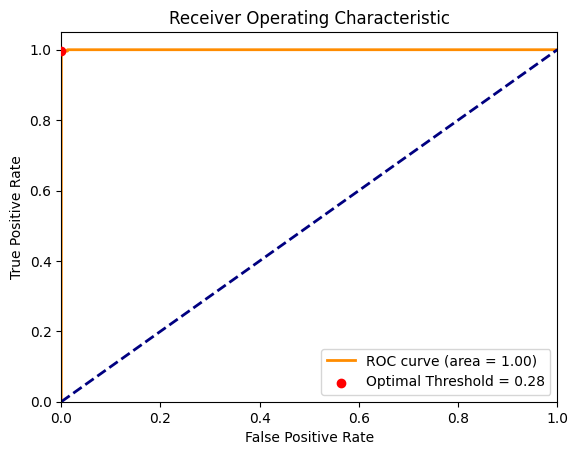

In [9]:
fpr, tpr, thresholds = roc_curve(labels, distances)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}', zorder=5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

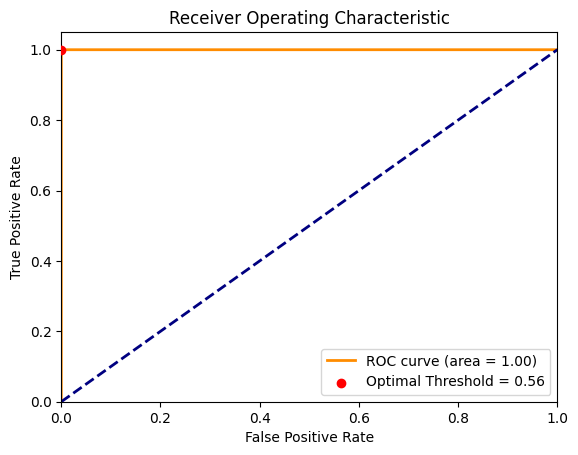

In [7]:
fpr, tpr, thresholds = roc_curve(labels_big, distances_big)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}', zorder=5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()